# **1. Importing libraries**

In [33]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer,classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# 2. Data Reading and data discovering

In [2]:
df_test = pd.read_csv(r'C:\Users\isa.zeynalov\Desktop\Multi-Class Prediction of Obesity Risk\test.csv')
df_train = pd.read_csv(r'C:\Users\isa.zeynalov\Desktop\Multi-Class Prediction of Obesity Risk\train.csv')

In [3]:
df_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [4]:
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [7]:
df_test_uniques = df_test.apply(pd.unique).to_frame(name="Uniques")
df_train_uniques = df_train.apply(pd.unique).to_frame(name="Uniques")

# Concatenate the dataframes side by side
result = pd.concat([df_test_uniques, df_train_uniques], axis=1)

# Display the result
print(result)

                                                                          Uniques  \
id                              [20758, 20759, 20760, 20761, 20762, 20763, 207...   
Gender                                                             [Male, Female]   
Age                             [26.899886, 21.0, 26.0, 20.979254, 19.799054, ...   
Height                          [1.848294, 1.6, 1.643355, 1.553127, 1.627396, ...   
Weight                          [120.644178, 66.0, 111.600553, 103.669116, 104...   
family_history_with_overweight                                          [yes, no]   
FAVC                                                                    [yes, no]   
FCVC                            [2.938616, 2.0, 3.0, 1.202075, 2.061969, 2.816...   
NCP                             [3.0, 1.0, 2.977909, 4.0, 2.256119, 1.281683, ...   
CAEC                                          [Sometimes, Always, Frequently, no]   
SMOKE                                                            

In [8]:
# Assuming df_train is your DataFrame
data_summary = pd.DataFrame()

for column in df_train.columns:
    if df_train[column].dtype == 'object':
        data_summary[column] = {
            'data type': df_train[column].dtype,
            '#missing': df_train[column].isnull().sum(),
            'Duplicate': df_train[column].duplicated().sum(),
            '#unique': df_train[column].nunique(),
            'top value': df_train[column].mode().iloc[0],
            'Freq': df_train[column].value_counts().index[0]
        }
    else:
        data_summary[column] = {
            'data type': df_train[column].dtype,
            '#missing': df_train[column].isnull().sum(),
            'Duplicate': df_train[column].duplicated().sum(),
            '#unique': df_train[column].nunique(),
            'min': df_train[column].min(),
            'max': df_train[column].max(),
            'avg': df_train[column].mean(),
            'std dev': df_train[column].std(),
        }


In [9]:
data_summary.drop(columns='id',inplace=True)

In [10]:
data_summary.transpose()

,data type,#missing,Duplicate,#unique,min,max,avg,std dev
Gender,object,0,20756,2,NaN,NaN,NaN,NaN
Age,float64,0,19055,1703,14.0,61.0,23.841804,5.688072
Height,float64,0,18925,1833,1.45,1.975663,1.700245,0.087312
Weight,float64,0,18779,1979,39.0,165.057269,87.887768,26.379443
family_history_with_overweight,object,0,20756,2,NaN,NaN,NaN,NaN
FAVC,object,0,20756,2,NaN,NaN,NaN,NaN
FCVC,float64,0,19824,934,1.0,3.0,2.445908,0.533218
NCP,float64,0,20069,689,1.0,4.0,2.761332,0.705375
CAEC,object,0,20754,4,NaN,NaN,NaN,NaN
SMOKE,object,0,20756,2,NaN,NaN,NaN,NaN


# 3. Some Insighful Visualizations

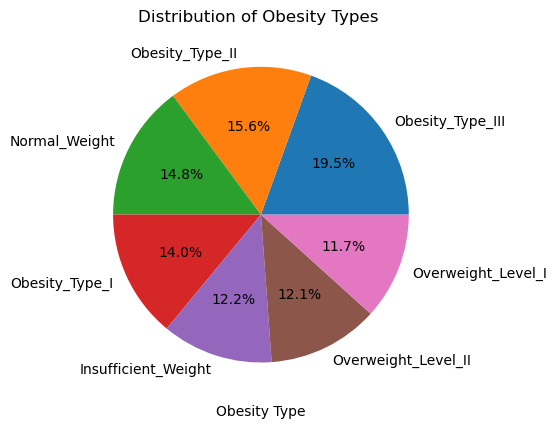

In [11]:
# Get the counts for each unique value in the 'Obesity' column
obesity_counts = df_train['NObeyesdad'].value_counts()

# Extract pie chart slice labels
pie_chart_slice_labels = obesity_counts.index.to_numpy()  # Convert to NumPy array for plotting

# Create a pie chart
plt.pie(obesity_counts, labels=pie_chart_slice_labels, autopct="%1.1f%%")  # Customize as needed

# Add labels and title (customize as needed)
plt.xlabel('Obesity Type')
plt.title('Distribution of Obesity Types ')

plt.show()

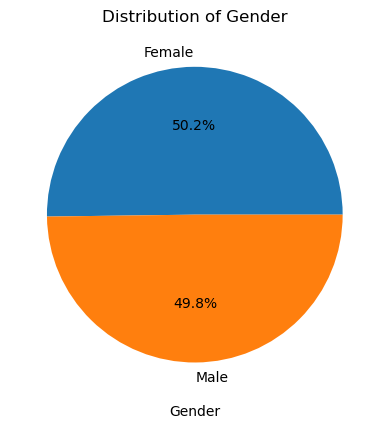

In [12]:
# Get the counts for each unique value in the 'Obesity' column
gender_counts = df_train['Gender'].value_counts()

# Extract pie chart slice labels
pie_chart_slice_labels = gender_counts.index.to_numpy()  # Convert to NumPy array for plotting

# Create a pie chart
plt.pie(gender_counts, labels=pie_chart_slice_labels, autopct="%1.1f%%")  # Customize as needed

# Add labels and title (customize as needed)
plt.xlabel('Gender')
plt.title('Distribution of Gender')

plt.show()

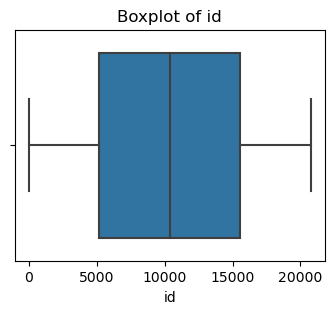

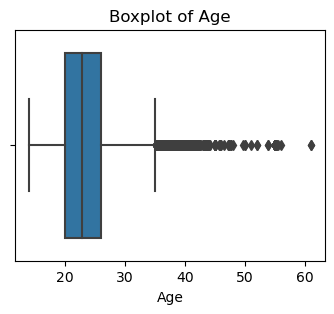

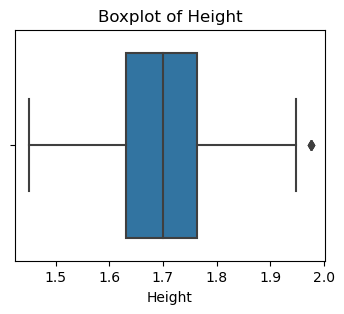

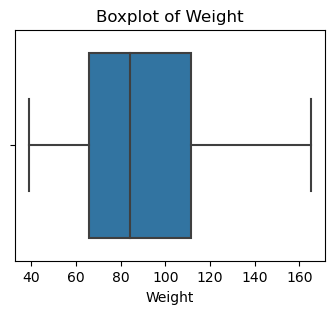

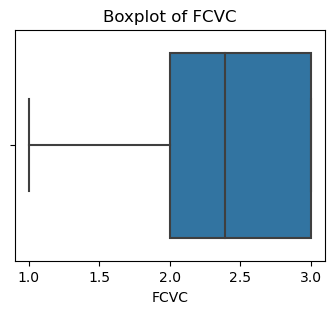

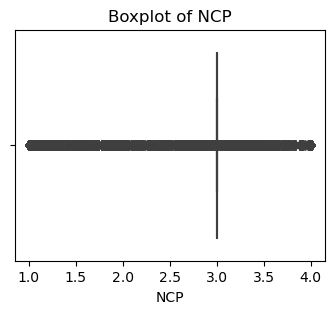

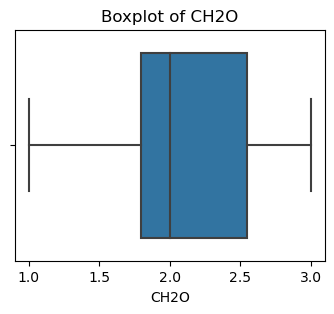

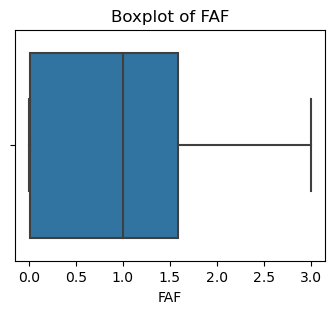

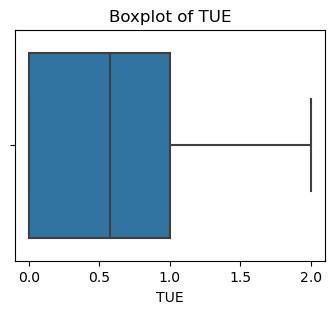

In [13]:
columns = df_train.columns
for column_name in columns:
    # Check if the column contains numerical data
    if pd.api.types.is_numeric_dtype(df_train[column_name]):
        plt.figure(figsize=(4, 3))
        sns.boxplot(x=df_train[column_name])
        plt.title('Boxplot of ' + column_name)
        plt.show()
        

**Note : Outliers present in Age column**

**Outlier count and the shape of Age column**

In [14]:
# Calculate the IQR
Q1 = df_train['Age'].quantile(0.25)
Q3 = df_train['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers_count = ((df_train['Age'] < lower_bound) | (df_train['Age'] > upper_bound)).sum()
print("Number of outliers in the Age column:", outliers_count)

Number of outliers in the Age column: 1074


In [15]:
df_train['Age'].shape

(20758,)

In [16]:
# Calculate the IQR
Q1 = df_train['Age'].quantile(0.25)
Q3 = df_train['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_train = df_train[(df_train['Age'] >= lower_bound) & (df_train['Age'] <= upper_bound)]

In [17]:
# Convert Height from cm to meters

# Calculate BMI
df_train['BMI'] = df_train['Weight'] / (df_train['Height'] ** 2)
df_test['BMI'] = df_test['Weight'] / (df_test['Height'] ** 2)

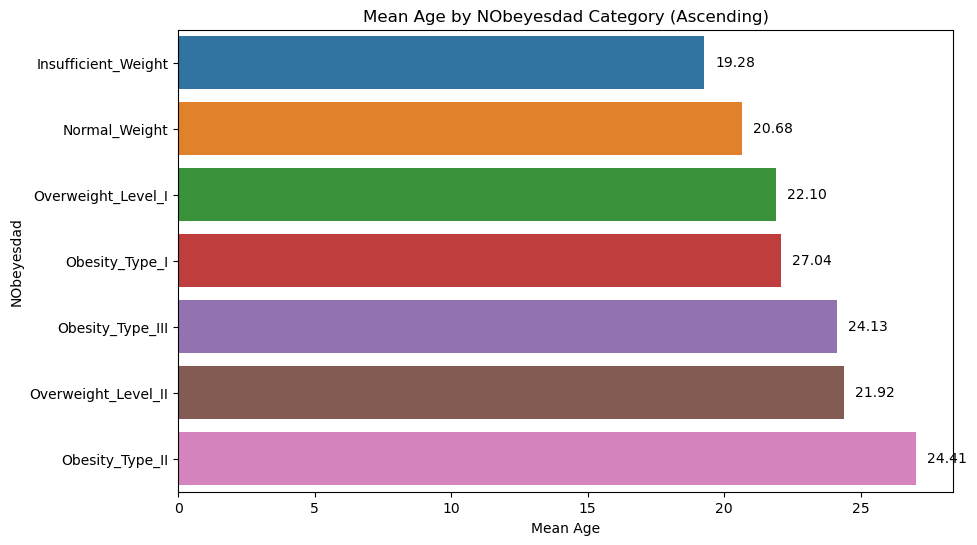

In [18]:
# Calculate mean age by NObeyesdad category
mean_age_by_category = df_train.groupby('NObeyesdad')['Age'].mean().reset_index()

# Sort the DataFrame by mean age in ascending order
mean_age_by_category.sort_values(by='Age', inplace=True)

# Calculate bar positions (assuming equal bar width)
bar_width = 0.8  # Adjust this if bar width changes
bar_positions = mean_age_by_category['Age'] + (bar_width / 2)  # Center of each bar

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=mean_age_by_category, x='Age', y='NObeyesdad', orient='h')

# Add mean age values outside each bar
for index, row in mean_age_by_category.iterrows():
    plt.text(bar_positions.iloc[index], index, f'{row["Age"]:.2f}', color='black', va='center', fontsize=10)

plt.title('Mean Age by NObeyesdad Category (Ascending)')
plt.xlabel('Mean Age')
plt.ylabel('NObeyesdad')
plt.show()

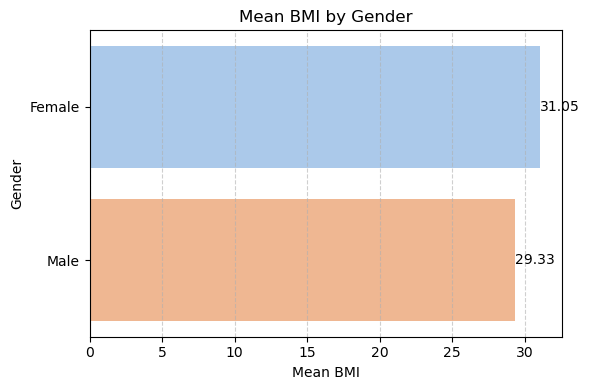

In [19]:
# Calculate mean BMI by gender
mean_bmi_by_gender = df_train.groupby('Gender')['BMI'].mean().reset_index()

# Set color palette for genders
colors = sns.color_palette('pastel')

# Create a horizontal bar plot
plt.figure(figsize=(6, 4))
barplot = sns.barplot(data=mean_bmi_by_gender, x='BMI', y='Gender', palette=colors)

# Add value annotations
for index, row in mean_bmi_by_gender.iterrows():
    barplot.text(row['BMI'], index, f'{row["BMI"]:.2f}', color='black', va='center')

# Add labels and title
plt.xlabel('Mean BMI')
plt.ylabel('Gender')
plt.title('Mean BMI by Gender')

plt.grid(axis='x', linestyle='--', alpha=0.6)  # Grid lines on x-axis

plt.tight_layout()  # Adjust spacing to avoid label clipping
plt.show()

# 4. Pre-Processing

In [20]:
# Define feature matrix X and target variable y
X = df_train.drop(columns=['NObeyesdad']) # Features
y = df_train['NObeyesdad'] # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical columns
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

preprocessing = ColumnTransformer([
    ('one_hot_encoding', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('scaling', StandardScaler(), numerical_cols)
])

# 5. Modelling

In [21]:
# Define pipelines (start with simpler models)
pipelines = {
  "LogisticRegression": Pipeline([
      ('preprocessing', preprocessing),
      ('lr', LogisticRegression())
  ]),
  "RandomForest": Pipeline([
      ('preprocessing', preprocessing),
      ('rf', RandomForestClassifier())
  ]),
}

# Reduce hyperparameter search space (consider adjusting values)
param_grids = {
  "LogisticRegression": {
    'lr__C': [0.1, 1.0],
    'lr__penalty': ['l1', 'l2']
  },
  "RandomForest": {
      'rf__n_estimators': [50, 100],  # Fewer values to try initially
      'rf__max_depth': [None, 5],      # Fewer values to try initially
  }
}

# Define scoring metrics
scoring = {
  "accuracy": make_scorer(accuracy_score)
}

# Hyperparameter tuning and model selection (use n_jobs for parallelization)
best_model = None
best_score = 0

for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], scoring=scoring, cv=3, refit='accuracy', n_jobs=-1)  # Use all CPU cores
    grid_search.fit(X_train, y_train)
  
  # Get best model and its score
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_

# Evaluate the best model on the testing set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Model:", best_model)
print("Best Model Accuracy:", accuracy)

Best Model: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one_hot_encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC', 'MTRANS']),
                                                 ('scaling', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE'])])),
                ('rf', RandomForestClassifier())])
Best Model Accuracy: 0.8920497840995681


In [22]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.91      0.92       521
      Normal_Weight       0.81      0.88      0.85       621
     Obesity_Type_I       0.90      0.87      0.89       496
    Obesity_Type_II       0.96      0.98      0.97       580
   Obesity_Type_III       1.00      0.99      1.00       788
 Overweight_Level_I       0.79      0.72      0.76       452
Overweight_Level_II       0.78      0.79      0.78       479

           accuracy                           0.89      3937
          macro avg       0.88      0.88      0.88      3937
       weighted avg       0.89      0.89      0.89      3937



In [23]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Confusion Matrix:
[[473  46   0   1   0   1   0]
 [ 28 547   1   0   0  35  10]
 [  1   2 433  15   2   8  35]
 [  0   0   9 568   0   0   3]
 [  1   1   2   0 784   0   0]
 [  3  56   4   0   0 327  62]
 [  0  21  32   5   0  41 380]]


In [24]:
# Predict on the test data using the best model
y_pred_test = best_model.predict(df_test)

# Create the submission dataframe with only "id" and "NObeyesdad" columns
submission_df = pd.DataFrame({
    "id": df_test["id"],  # Assuming "id" is the ID column in your test data
    "NObeyesdad": y_pred_test
})

# Save the submission dataframe as a CSV file
submission_df.to_excel("submission.xlsx", index=False)
